In [1]:
#Run this cell to load dependencies
drive_path = 'e:/'
import numpy as np
import pandas as pd
import os
import h5py
import glob
import matplotlib.pyplot as plt
import scipy.stats as stat
%matplotlib inline
from allensdk.core.brain_observatory_cache import BrainObservatoryCache
manifest_path = os.path.join(drive_path,'BrainObservatory','manifest.json')
boc = BrainObservatoryCache(manifest_file=manifest_path)

# select the good cells
good_all=np.load('good_dfof3_cell_ids.npy')

In [2]:
# Drifting gratings
file_path = r'E:\BrainObservatory\ophys_analysis\*_A_analysis.h5'
file_list = glob.glob(file_path)
peak_tables_l4 = []
peak_tables_l23 = []
peak_tables_l5 = []

for f in file_list:
    tmp = pd.HDFStore(f, "r")
    peak_table = pd.DataFrame(tmp.select('/analysis/peak'))
    
    # get good cells for this ophys dataset
    ophys_exp_id = peak_table['ophys_experiment_id'][0]
    exp = boc.get_ophys_experiments(ids = [ophys_exp_id])
    data = boc.get_ophys_experiment_data(ophys_experiment_id = exp[0]['id'])
    good_cell_specimen_id = np.intersect1d(data.get_cell_specimen_ids(), good_all)
    good_cell_index = data.get_cell_specimen_indices(good_cell_specimen_id)
    if peak_table['targeted_structure'][0] == 'VISp':
        if peak_table['imaging_depth'][0] == 175:
            peak_tables_l23.append( peak_table.loc[good_cell_index])
        elif peak_table['imaging_depth'][0] == 375:
            peak_tables_l5.append( peak_table.loc[good_cell_index])
        else:
            peak_tables_l4.append( peak_table.loc[good_cell_index])

In [67]:
def plot_dist(index, bins = 40, plot_range = [], log = True):
    for idx, pt in enumerate(peak_tables_l4):
        if idx == 0:
            ptest_dg_set_l4 = pt[index]
        else:
            ptest_dg_set_l4 = np.r_[ptest_dg_set_l4, pt[index]]
    for idx, pt in enumerate(peak_tables_l23):
        if idx == 0:
            ptest_dg_set_l23 = pt[index]
        else:
            ptest_dg_set_l23 = np.r_[ptest_dg_set_l23, pt[index]]
    for idx, pt in enumerate(peak_tables_l5):
        if idx == 0:
            ptest_dg_set_l5 = pt[index]
        else:
            ptest_dg_set_l5 = np.r_[ptest_dg_set_l5, pt[index]]
    plt.figure(figsize = (10,5))
    plt.hist(ptest_dg_set_l4, range = plot_range, histtype='step',bins = bins, log = log, alpha=0.5, normed = True, label='layer4', color = 'Red');
    plt.hist(ptest_dg_set_l23, range = plot_range, histtype='step', bins = bins, log = log, alpha=0.5, normed = True, label='layer2/3', color ='Blue');
    plt.hist(ptest_dg_set_l5, range = plot_range, histtype='step', bins = bins, log = log, alpha=0.5, normed = True, label='layer5', color ='Green');
    print 'p value between l4 and l2/3:' + str(stat.mannwhitneyu(ptest_dg_set_l4, ptest_dg_set_l23)[1])
    print 'p value between l4 and 5:' + str(stat.mannwhitneyu(ptest_dg_set_l4, ptest_dg_set_l5)[1])
    print 'p value between l5 and l2/3:' + str(stat.mannwhitneyu(ptest_dg_set_l5, ptest_dg_set_l23)[1])
    
    plt.legend(loc='upper right', fontsize=20)
    if log == True:
        plt.ylabel('log probability density', fontsize=20)
    else:
        plt.ylabel('probability density', fontsize=20)
    plt.xlabel('%s for good cells in VISp'%index, fontsize=20)
    plt.show()

p value between l4 and l2/3:4.60726217232e-36
p value between l4 and 5:1.09892221831e-51
p value between l5 and l2/3:5.36579163936e-06


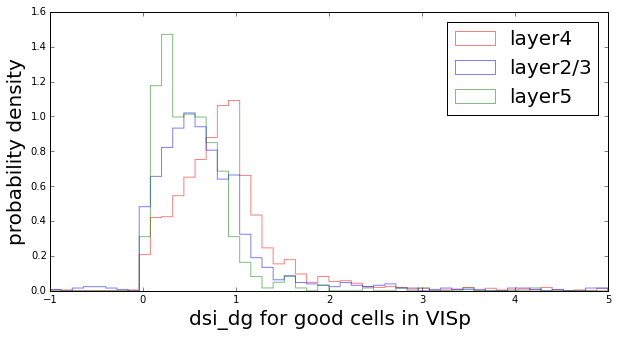

In [59]:
plot_dist('dsi_dg', bins =50, plot_range=[-1,5],log=False)

p value between l4 and l2/3:2.86294907953e-16
p value between l4 and 5:1.57148115121e-38
p value between l5 and l2/3:3.12901180315e-07


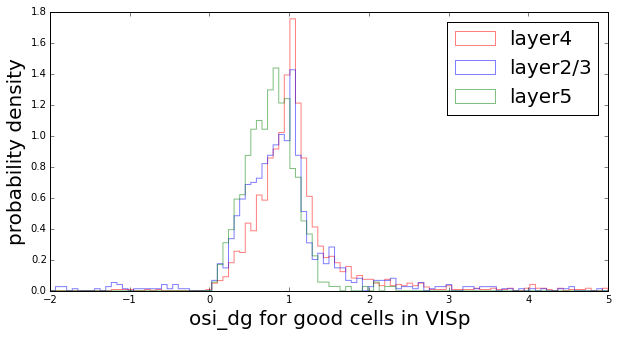

In [60]:
plot_dist('osi_dg', bins = 100, plot_range = [-2, 5],log=False)

p value between l4 and l2/3:3.49184595869e-06
p value between l4 and 5:8.2926073204e-14
p value between l5 and l2/3:8.56678916224e-26


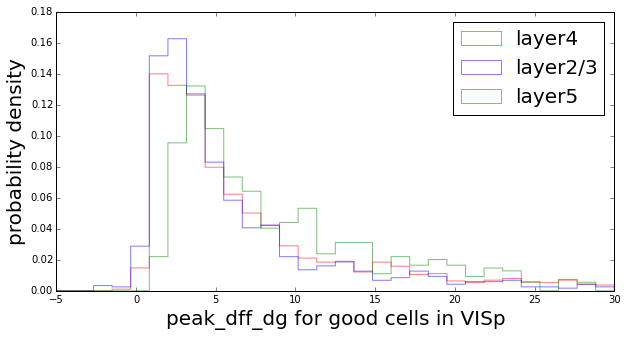

In [61]:
plot_dist('peak_dff_dg', bins =30, plot_range=[-5,30],log=False)

p value between l4 and l2/3:5.61809146925e-83
p value between l4 and 5:2.59788729565e-15
p value between l5 and l2/3:1.22062858601e-12


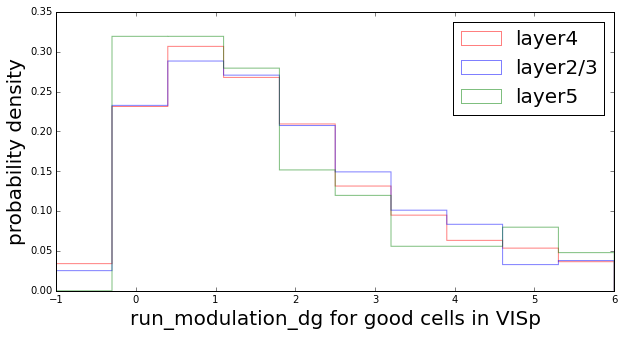

In [66]:
plot_dist('run_modulation_dg', bins =10, plot_range=[-1,6],log=False)